# 

# Common Tweet Emojis

<div class="alert alert-success"> 
In order to assess how many emojis we want to gather data for, we need to run an analysis of the most used ones. (Indeed, asking a few thousands users to describe an emoji like 🥍 might be less useful than😄) 
</div>

In [91]:
from collections import Counter
import emoji
import seaborn as sns
import pandas as pd
import resource
from tqdm import tqdm
from IPython.core.debugger import set_trace
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import bz2
import json
from IPython.core.debugger import set_trace
sns.set()

In [2]:
def limit_memory(maxsize): 
    """ Prevent computer from crashing"""
    soft, hard = resource.getrlimit(resource.RLIMIT_AS) 
    resource.setrlimit(resource.RLIMIT_AS, (maxsize, maxsize)) 
#limit_memory(10000)

In [260]:
def read_twitter_data(N_LIM=10):
    tweet_df = []
    main_path = Path("/dlabdata1/gligoric/spritzer/tweets_pritzer_sample/")
    np.random.seed(13)
    subpaths = np.random.permutation(list(main_path.iterdir()))
    # we only take the twitter_stream
    subpaths = [path for path in subpaths if path.stem.startswith("twitter_stream")]
    tweet_paths = [tweet_path for subpath in subpaths for tweet_path in np.random.permutation(list(subpath.rglob("*.json.bz2")))[:N_LIM]]
    print(f"Analyzing {len(tweet_paths)} files")
    for tweet_path in tqdm(tweet_paths):
        new_tweets = []
        with bz2.open(tweet_path, "rt") as bzinput:
            for line in bzinput: 
                try:
                    tweet = json.loads(line)
                except json.JSONDecodeError:
                    continue
                if len(tweet.keys()) < 5 :
                    continue
                tweet = {key:tweet[key] for key in ['id','lang','text']}
                new_tweets.append(tweet)
        tweet_df += new_tweets
    return pd.DataFrame(tweet_df)

In [3]:
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)

extract_emojis("😚;👻💆🏿🚯🇸🇷")

'😚👻💆🏿🚯🇸🇷'

In [209]:
def update_emoji_count(dic,text):
    """
    Update the counts of each emoji wrt to text
    
    Args:
        dic(dict): mapping emojis--> count
        text (str): text to use to update dic
    """
    for char in text:
        if char in emoji.UNICODE_EMOJI:
            dic[char] = dic.get(char,0) + 1

In [ ]:
def print_mem_usage(df):
    mb_usage = df.memory_usage(deep=True).sum() / 1e6
    print(f"Memory usage:{mb_usage:.2f} MB")

In [24]:
tweet_path = Path("../data/raw/tweets/example-tweets.txt")

# 8Mo tweet dataset
if tweet_path.exists():
    tweet_df = pd.read_csv(tweet_path,sep="\t",header=None,parse_dates=True)
# 111 machine bigger twitter dataset
else:
    tweet_df = read_twitter_data(1)

In [262]:
tweet_df = read_twitter_data(10)

  0%|          | 0/2750 [00:00<?, ?it/s]

Analyzing 2750 files


100%|██████████| 2750/2750 [40:49<00:00,  1.12it/s]


In [264]:
tweet_df.to_csv("/home/ymentha/tweet.csv")

In [265]:
print_mem_usage(tweet_df)

Memory usage:2140.01 MB


In [266]:
emojis_count = {}
for text in tqdm(tweet_df['text']):
    update_emoji_count(emojis_count,text)

em_df = pd.Series(emojis_count).sort_values(ascending=False)

100%|██████████| 6706514/6706514 [01:13<00:00, 91477.24it/s] 


In [267]:
# TODO: correct for missing emojis
absent_emojis = set(emoji.UNICODE_EMOJI) - set(emojis_count.keys())
print(f"Grasped {len(emojis_count) / len(emoji.UNICODE_EMOJI)* 100:.2f}% of the total emojis")
print("Missing emojis")
for em in absent_emojis:
    print(em,end="")

Grasped 32.31% of the total emojis
Missing emojis
👨🏽‍🔧🏌🏼‍♂️👩🏼‍🚀🤸🏽‍♀️*️⃣🤷🏾👉🏽🙋🏼‍♂👨🏻‍🎓🧑🏽‍🤝‍🧑🏻🙆🏿‍♂️👃🏼🙆🏿‍♀👨‍🦲🤦‍♀️🧕🏾👴🏿👩🏽‍🏫🇩🇰🙎🏿‍♀🇩🇿🏃🏾‍♂🧜🏽‍♀️🖖🏻👷‍♀️🦸🏿🙎🏿🧞‍♂✉️👆🏾👨🏾‍🌾🙎🏻‍♂️🙇🏿🏊‍♂💂🏿👩🏿‍🎨👨‍👨‍👦‍👦💂🏼🧑🏼‍🤝‍🧑🏻👨🏽‍🦯🤾🏿🇽🇰💂🏽🪑🧚🏾‍♀💇🏼🧔🏾👮🏼‍♂🚣🏿‍♀️🧘🏿‍♂✊🏼🙍🏽‍♂️🧙🏻‍♂️🏊🏼🧖🏿‍♂️👳🏿🇲🇾🧚🏽‍♀👶🏽🧏🏼💁🏼‍♂️🚣🏾‍♂🚵‍♀️🇺🇦⏏️👩🏽‍🤝‍👨🏻🖲️✖️🧕🏿🧝🏻‍♂🙌🏾👼🏿🏟️🇹🇳👨🏿‍🦰👨‍🏭🕵🏻‍♀️🙅🏾‍♀️👩🏼‍🌾🙍🏽‍♂👵🏽👨‍👦‍👦👨🏽‍🦲👨🏼‍⚖️🤍🦹🏾‍♂️💂🏻‍♂👩‍🌾🤦🏻‍♂️👩‍✈🏃🏿‍♂️🧗🏿‍♂️🧚🏼‍♂🤳🏽♠️👋🏾🧍🏾🚶🏻‍♀🏃🏾‍♀️👸🏽⛹🏿‍♀💁🏻🏄🏿‍♀️🧛🏽‍♂👩🏻‍🦰⛹🏼‍♂️🏋🏼‍♂👵🏿👩🏾👩🏿‍🤝‍👩🏽🧓🏻👨🏽‍🎤🧚🏻👨🏿‍🤝‍👨🏾🚶🏿‍♂⛹🏿‍♀️👮🏻‍♀🧘🏻‍♂️🇫🇷🙇🏼‍♂✈️🧙🏼‍♂👩🏻‍🔬👭🏻🧙🏽‍♀👷‍♂🚣🏿‍♀🦿🇻🇺🗄️🧑🏽‍🤝‍🧑🏽💁🏻‍♂💆🏿‍♂️🧛🏼‍♂🧝🏾‍♀️🧓🏿💇🏿‍♀🤽🏾‍♀️🧝‍♀🧑🏿‍🤝‍🧑🏼🙋🏼‍♀️👩🏼‍🎓🇬🇦🧏🏽‍♀️🏇🏿🚵🏽🙆🏼🇮🇶🧚🏾👫🏾🧛🏿‍♂️🙌🏿🤘🏿👩🏼‍⚖️💂🏾‍♀️👮🏼‍♀🇮🇷🇲🇴💆‍♂🤞🏽👨🏼‍🔧🏊‍♀👨🏽‍🍳👧🏻👮🏽‍♀️⛹🏾‍♂🏋‍♂️🇸🇰🧎🏽‍♀🕰️🇳🇪👲🏾🇻🇪🤸🏿‍♀🤽🏼‍♀️🕵🏼‍♂👩‍❤‍👨❄️🇨🇱🌬️🏊🏿‍♀🧜‍♂👩🏻‍⚕👮🏾‍♀️👷🏽‍♂️👩🏽‍🚒🚴🏾‍♀👲🏿👩🏿‍✈🇲🇺2⃣🇲🇭🙋‍♂️🙇‍♀️🧛🏼‍♀🤼‍♀🤽‍♂️🇦🇽🚶🏽🤟🏾👌🏻✒️🏄‍♀️👉🏼🧎🏽‍♂🧗🏿‍♀👨‍👩‍👧🏊🏻‍♂️🚣🏾‍♀🏊🏽👳🏿‍♀️🇦🇼🤏🏾👨🏿‍🦼🧓🏾🏌🏿‍♂🇨🇵🟥🇿🇼🇲🇻👷🏻‍♀🤛🏿⛑️🧗🏾‍♀️👨🏿‍🔧🏊🏻‍♂🏋🏼👲🏻🏃‍♂🕵🏾🚶🏻‍♂️🧝‍♂🧎🏿‍♂️👧🏽🇸🇾🏌🏻👷‍♀🚴‍♂️👨🏾‍🦰👩🏻🇵🇦🧙🏾‍♀️🤷🏻‍♀💇‍♀️🤹‍♂️👱🏾‍♂️🙎‍♀️🤹🏼‍♂️🧝🏿‍♂️🧛🏻‍♂️🏋️‍♀🧜‍♀️🚴🏾‍♂🙋🏽‍♀️👮🏿‍♂🚴🏽‍♀️👨🏼‍✈️🚴🏻‍♀🤹🏻‍♂️👵🏼🙇🏿‍♂🤷🏽‍♀👨🏾‍🎨⛹🏾‍♂️🇩🇯🖖🏽👩‍🎓🇿🇲🙎🏻‍♀⛹🏾‍♀️🤶🏻🪕🧗🏼‍♀👮🏼‍♂️🤷🏽‍♀️💇🏾‍♂️🤴🏾🏃🏾🇲🇦💇‍

In [269]:
for em in em_df.head(1000).index:
    print(em,end="")

😂😭❤😍✨🤣🏻🔥💕💜👏🙏💙😊♥♀💖🥺‼👍🥰💛🎉😘☺🤔♂💦🏼💗🎁💚🏽😁😆👇💓🤦🌸💔😅🏾🙌💪😔🙄👉❗😢👀🖤😎🌹🇸👌💞😉😳😩💀🤗🎶✌😱🏆❣🌟😌🇺🤷💥🤤🇷😇🚨⭐😋😡✔💘🤩🐰😈💋💯🔴✅😏🤪▶⚠🙇☀🇪🤭🇦🌈🙈🎊😄💫👑⚡🙂😜🎵🍀➡😀🧡😃🙋🌻🙃🥳🎂⬇✊🇳⚽🤧🗣💃🐶🇹👊😤📸🇬🍑😒🦋🐥😫🌷❌🐯🇧❄😴🇨👋🇵🍃🌺🇮🏿😝☹💢👩📍🌼⚪💝💐🎥💰🏃🐱😚😻💎🎄🍓😣😪😬🙆😑©✋🤮🎀👈🌿♻👨🎈⁉📷🌙😥✈🇰😹🇲🥴🤘🤡🔵🤯😞📣🌚☁☝🤢👅💨📢📌🍆🐻🌕🍒🕊☕▪🥵📱❓🤙🚀🌱📺😐🤬🙊🌞🎤🔞🌑🦁😠🌴🌊😛🤟💧😓🔗💸🔁⚫💭🕯👧🤞🤝🇩🇭🎧💩🤫💌🕺🐾🇴😲😰👦👼😖🎬🧐🤠💵😕🇱🔸😮🔹🐹⭕㊗🤨➖👶🍁🐍🆘⏰🖕🚶💁💤🍫📹🔻💟✍😶🍊🇫🥀🎅⤵🤲🔔🇻☑😵🍻🤓🍎🐷👁💡🎼💣🏳🇯🌎👻🌌🐐🙅〰👎🤑☠🍺🍭😙🎯🍼💍😨♨👆📽📲🐝🔊🇽🏀🔪🚫☘🍂💅🔫📚🔘🚩🦊🌳⤴☎🐨🐣🍌🐢🥇🌘🐸😯☔🔄👤🦄🌒🥂❕🌝🐈🇿🍕📝🎆🔃♦👄🐿🐟♠😗😷🌖🧚⚔🌲🐺🍾🇾🔝🍋🌍🐕🍷🐦⚾🌗™🕷🍬🎸🌔🥶⚜🐼🍇🌓🦅🌾☄🎙👸💬😟🙁®🗓🎓🤐🐬🖐▫👥🌧☃⏩🧸🍯🎨👐🔮🏁🏴🍰🔷💏🍜💻🐧⌚🎮📰🤚🔽💉🌠👽💄📎🐤🛑✴🍣🔺🎍🇼📻🍉📞🍄💆🌀😸🐘✖🍔🐉🦈🤕🔶🏠💿👿🏅♣⬅🔜🍿🎃🗳🍦🚗😽🌶🍞📩⛄😿💮🍵🍪⛔⬆🌪🍗💠🌏🤒🌵⬛😧✏🐭🐳🆚🐙📮🔆👹👮🐊🌰🦍🍅🥕🚘🌃👠🔒⬜📈👫👙🦀📊🏖🔰🎻🕸🤰◀🎩🛫⚰🐴📖🎹🏟🎇🍨🍏🏝✂🥁📆⏱🍳🐎🤥🙀📅🍩🍖🆕👣🤴🎗🎞🐽🍚✳😺🏹👺🥊🙉🦇💊⏳😦🐇🍴🐑🏈🆓👾😼👯🔐🍹🗿㊙🚬🌐❇🌅🔎⚓🏄🐀🎟↗🏫🐒◾➰👭🎫🤸🧠🎭🦌🏍🤜✝👂💑🦖🤛🐔🧿➕👓🍙🥤⛓🤖🔱🌤◼❔🐜🇶☂🍡🗞🍥🖇👕🚂🧢🌨🏡🍮🐮🍍🍸👱🍟🥑🦐🐠🍈🐞🍛👬🤳↪🍧🚌🅾👔🎾👃🥚⛰🦉⏬🐄🅱🦆🔍🐓🖖🥖🔙🥃🏊↔🐖🦑🌬⚖🐋◽✒🏋🎲✉🥛💴🗡🥩🛍🕋👟🚮💲🧀🥈🍽🐲🕶🌛🌽🏵↘📀⛅🚙🎖🔑🐗💳📦🥓🚴↙🎋🧜👴🦃🔨🚒🏮☪🌄🅰⛈🛸🗝🐵❎💼🥋🖋🧔🌋🍝🗻🥞🥉🛬⛱📗👰🗽💒🥝🐚🆗📜🎺🛒📕🎪🥒🎰🛡🔟🐏🚦🐂👗🔛🔅☮🧟🚲🚔🍐🔖🍶👵🏏🚑🥦🥄🥟🧘✡🍤📡📏🏐⛵🌜♾🚧🕵⚕🦒◻📁🆙🥔🐅🏰♋🔋💶🥜🚃🏩🗨🚿🧙😾📃🎷Ⓜ🎌🃏🎡🖥👢🕹🐩🦎🐛🔓⛳🏇🎐🚁🖌🐆📛🏎🍠🦰🎏🧨📋🎱⌛🧒🌇🏷🚺🌫📉⚙🌮🔲🔌⏪🧑📥🔬🏌💇🚚🗼🍲☯🥐🍱🉐☢🕒🚄🐌👒⏏🕴🙎🐡🌂🎠🧞🏉🤵🚓🖼🙍🚢🎣👘🖊🧧🈶🕌↩🅿🌭🛎🥗🧦👪🔈🌡⛽🏥📼📄🦔👷👖🦸🔳ℹ📿🧁🕰🎦👞♿🗺🏒🎒⛸📂📬📨♊🧤🔕🦱📧🤱🏞🌥🦕🖍🔂🛌🏔🔧↖🗑🎢🎳〽🦂🛁👳⛹🧩🕐🧬🌩☣🥪💈🈁📯🗯🆒🔀💷🕛🧛🦗🏜♈🥅🛩↕🔉🏛🥬🚕🚽📘🦵♉🐃⚒🦜🔼🍢🚛🥢🚅🌦🛀⛪🛳🏨🧣🛏🛵🏢🛠🚪👛🥨♏🕉🥧🏙🧕➿🥘🚹🌆🚜🦶👚🛋🤶🛰🤼🕙🚖🥭🔚💾🗒🤾🏘🆔🐁🦷🔭🏯🚣📒🦓👜🤹🏓

Q25:113.5
Q50:1428.5
Q75:363.0
Q99:33846.619999999966


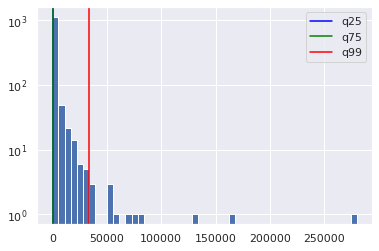

In [276]:
fig, ax = plt.subplots(1)
em_df.hist(ax = ax,bins=50)
ax.set_yscale('log')
q25,q50,q75,q99 = em_df.quantile(0.25),em_df.quantile(0.75),em_df.quantile(0.5),em_df.quantile(0.99)
ax.axvline(q25,color='blue',label = 'q25')
ax.axvline(q75,color='green',label = 'q75')
ax.axvline(q99,color='red',label = 'q99')
ax.legend()
print(f"Q25:{q25}")
print(f"Q50:{q50}")
print(f"Q75:{q75}")
print(f"Q99:{q99}")

<AxesSubplot:>

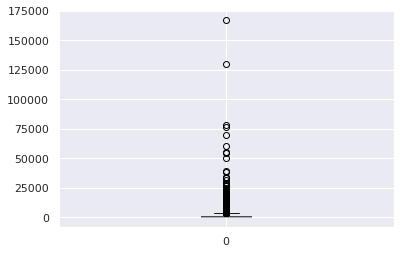

In [274]:
em_df[1:].to_frame().boxplot()